In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ray
import ray.rllib

import pyquake.proto
import q1physrl.env

/home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
ray.init()

2020-01-31 20:35:26,614	WARNING worker.py:682 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-01-31 20:35:26,663	WARNING services.py:592 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-01-31 20:35:26,721	INFO resource_spec.py:212 -- Starting Ray with 1.9 GiB memory available for workers and up to 0.97 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-01-31 20:35:27,007	WARNING services.py:1080 -- Failed to start the dashboard. The dashboard requires Python 3 as well as 'pip install aiohttp psutil setproctitle grpcio'.
2020-01-31 20:35:27,086	WARNING services.py:1004 -- Failed to start the reporter. The reporter requires 'pip install psutil'.


{'node_ip_address': '192.168.178.24',
 'redis_address': '192.168.178.24:14065',
 'object_store_address': '/tmp/ray/session_2020-01-31_20-35-26_617505_28478/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-01-31_20-35-26_617505_28478/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2020-01-31_20-35-26_617505_28478'}

In [3]:
trainer = ray.rllib.agents.ppo.PPOTrainer(
    env=q1physrl.env.PhysEnv,
    config={"env_config": {"num_envs": 100}, "gamma": 0.9}
)

2020-01-31 20:35:27,389	INFO trainer.py:377 -- Tip: set 'eager': true or the --eager flag to enable TensorFlow eager execution
2020-01-31 20:35:27,404	ERROR logger.py:328 -- pip install 'ray[tune]' to see TensorBoard files.
2020-01-31 20:35:27,406	WARNING logger.py:417 -- Could not instantiate TBXLogger: No module named 'tensorboardX'.
2020-01-31 20:35:27,417	INFO trainer.py:524 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.


(pid=28532) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=28532)   warnings.warn(msg)
(pid=28530) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=28530)   warnings.warn(msg)
(pid=28532) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
(pid=28532)   warnings.warn(msg)
(pid=28530) /home/matt/.virtualenvs/100m-rl/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma modu

2020-01-31 20:35:35,732	WARNING util.py:41 -- Install gputil for GPU system monitoring.
2020-01-31 20:35:35,733	WARNING util.py:44 -- Install psutil to monitor system performance.


In [4]:
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-26_18-30-58enaj6dzm/checkpoint_54/checkpoint-54'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-27_21-54-210mybah6w/checkpoint_38/checkpoint-38'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_18-38-4507_f9y9o/checkpoint_42/checkpoint-42'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_18-48-34d96of62s/checkpoint_147/checkpoint-147'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_19-42-287sgxfik5/checkpoint_20/checkpoint-20'
# FNAME = '/home/matt/ray_results/A2C_PhysEnv_2020-01-29_20-03-30jpgozu93/checkpoint_209/checkpoint-209'
# FNAME = '/home/matt/checkpoint-141'
# FNAME = '/home/matt/checkpoint-8421'
# FNAME = '/home/matt/checkpoint-701'
FNAME = '/home/matt/checkpoint-13421'

trainer.restore(FNAME)

2020-01-31 20:35:36,064	WARNING trainable.py:210 -- Getting current IP.
2020-01-31 20:35:36,068	INFO trainable.py:416 -- Restored on 192.168.178.24 from checkpoint: /home/matt/checkpoint-13421
2020-01-31 20:35:36,076	INFO trainable.py:423 -- Current state after restoring: {'_iteration': 13421, '_timesteps_total': 53684000, '_time_total': 27770.81401658058, '_episodes_total': 149900}


In [5]:
DEMO_FILE_NAME = "wr13.dem"

In [6]:
import asyncio
loop = asyncio.get_running_loop()
task = loop.create_task(q1physrl.env.eval_coro(26000, trainer, DEMO_FILE_NAME))

In [7]:
raise Exception

Exception: 

In [8]:
obs, action = task.result()

In [9]:
obs *= q1physrl.env._OBS_SCALE

ERROR:asyncio:Task was destroyed but it is pending!
task: <Task pending coro=<AsyncClient._read_messages() running at /home/matt/pyquake/pyquake/client.py:215> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f1d172d9d68>()]> cb=[AsyncClient.connect.<locals>.<lambda>() at /home/matt/pyquake/pyquake/client.py:303]>


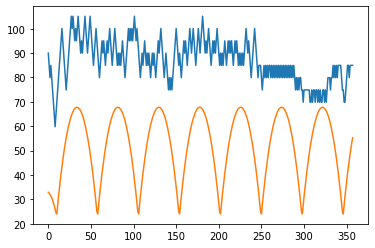

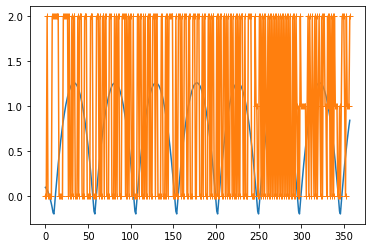

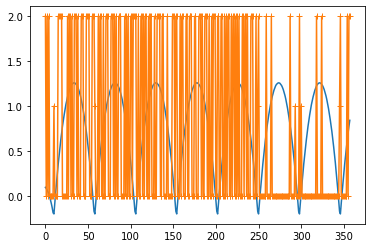

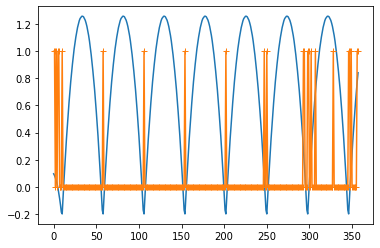

In [10]:
plt.plot(obs[:, 1])
plt.plot(obs[:, 2])

plt.show()
for a in action.T:
    plt.plot(obs[:, 2] / 30 - 1)
    plt.plot(np.arange(len(a)), a, marker='+')
    plt.show()

Take the actions from the above run and push them through the PhysEnv.
Comparing the observations will reveal potential bugs.

In [11]:
env = q1physrl.env.PhysEnv({'num_envs': 1})
o, = env.vector_reset()

obs2= [o]

for a in action:
    (o,), _, _, _ = env.vector_step(a[None])
    obs2.append(o)
    
obs2 = np.stack(obs2[:-1])
obs2 *= q1physrl.env._OBS_SCALE

/home/matt/100m-rl/q1physrl/phys.py:89: RuntimeWarning: invalid value encountered in true_divide
  return np.where((speed > 0)[:, None], h_vel * (new_speed / speed)[:, None], h_vel)
/home/matt/100m-rl/q1physrl/phys.py:99: RuntimeWarning: invalid value encountered in true_divide
  wish_vel / unclipped_wish_speed[:, None],
/home/matt/100m-rl/q1physrl/phys.py:104: RuntimeWarning: invalid value encountered in true_divide
  (wish_speed / unclipped_wish_speed),


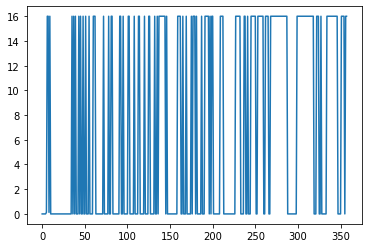

In [12]:
plt.plot(np.max(np.abs(obs - obs2), axis=1))
# plt.plot(np.argmax(np.abs(obs - obs2), axis=1))

Open the demo file we just made, and measure the speed

In [13]:
view_entity = None
origin = None
origins = []
times = []

time = None

def patch_vec(old_vec, update):
    return tuple(v if u is None else u for v, u in zip(old_vec, update))

with open(DEMO_FILE_NAME, 'rb') as f:
    for angles, msg in pyquake.proto.read_demo_file(f):
        if msg.msg_type == pyquake.proto.ServerMessageType.SETVIEW:
            view_entity = msg.viewentity
        if (msg.msg_type == pyquake.proto.ServerMessageType.SPAWNBASELINE and
                msg.entity_num == view_entity):
            origin = msg.origin
        if (msg.msg_type == pyquake.proto.ServerMessageType.UPDATE and
                msg.entity_num == view_entity):
            origin = patch_vec(origin, msg.origin)
            origins.append(origin)
            times.append(time)
        if msg.msg_type == pyquake.proto.ServerMessageType.TIME:
            time = msg.time

distance travelled 1821.75
final speed 466.54040404040404


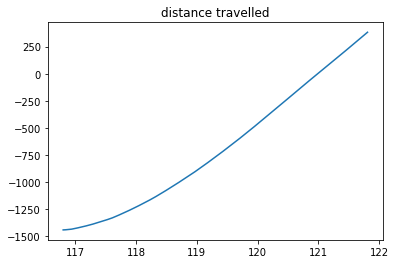

In [14]:
print('distance travelled', np.diff(np.array([o[1] for o in origins])).sum())
print('final speed', np.diff([o[1] for o in origins][-100:]).mean() / 0.014)
plt.title('distance travelled')
plt.plot(times, [o[1] for o in origins])

Just run forwards and see how much reward we get

In [15]:
env = q1physrl.env.PhysEnv({'num_envs': 1})
o, = env.vector_reset()
os = []
done = False
reward = 0
while not done:
    a = np.array([1, 1, 1])
    (o,), (r,), (done,), _ = env.vector_step(a[None])
    reward += r
    os.append(o)
os = np.stack(os)
os *= q1physrl.env._OBS_SCALE

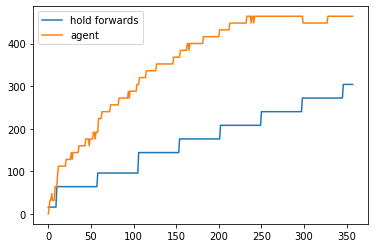

In [16]:
plt.plot(os[:, 4], label='hold forwards')
plt.plot(obs[:, 4], label='agent')
plt.legend()

In [18]:
os[:, 4].sum() * 0.014

859.712

In [17]:
obs[:, 4].sum() * 0.014

1777.44

In [ ]:
plt.plot(os[:, 4], label='hold forwards')
plt.plot(obs[:, 4], label='agent')
plt.legend()

0 2
-16 2
-32 2
-32 2
-48 2
-64 2
-64 2
-80 2
-96 2
-96 2
0 2
256 0
240 0
224 0
224 0
208 0
192 0
176 0
176 0
160 0
144 0
144 0
128 0
112 0
112 0
96 0
80 0
64 0
64 0
48 0
32 0
32 0
16 2
0 2
0 2
0 2
-16 2
-32 2
-32 2
-48 2
-64 2
-64 2
-80 2
-96 2
-96 2
-112 2
-128 2
-144 2
-144 2
-160 2
-176 2
-176 2
-192 2
-208 2
-208 2
-224 2
-240 2
-256 2
0 2
256 0
240 0
224 0
224 0
208 0
192 0
176 0
176 0
160 0
144 0
144 0
128 0
112 0
112 0
96 0
80 0
64 0
64 0
48 0
32 0
32 0
16 2
0 2
0 2
0 2
-16 2
-32 2
-32 2
-48 2
-64 2
-64 2
-80 2
-96 2
-96 2
-112 2
-128 2
-144 2
-144 2
-160 2
-176 2
-176 2
-192 2
-208 2
-208 2
-224 2
-240 2
-256 2
0 2
256 0
240 0
224 0
224 0
208 0
192 0
176 0
176 0
160 0
144 0
144 0
128 0
112 0
112 0
96 0
80 0
64 0
64 0
48 0
32 0
32 0
16 2
0 2
0 2
0 2
-16 2
-32 2
-32 2
-48 2
-64 2
-64 2
-80 2
-96 2
-96 2
-112 2
-128 2
-144 2
-144 2
-160 2
-176 2
-176 2
-192 2
-208 2
-208 2
-224 2
-240 2
-256 2
0 2
256 0
240 0
224 0
224 0
208 0
192 0
176 0
176 0
160 0
144 0
144 0
128 0
112 0
112 0